In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib

# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

In [2]:
datasets = {
    "fetal_head": {
        "name": "Fetal head",
        "path": "attention/fetal_head.csv",
    },
    "fetal_head_2": {
        "name": "Fetal head 2",
        "path": "attention/fetal_head_2.csv",
    },
    "kidneys": {
        "name": "Kidneys",
        "path": "attention/kidneys.csv",
    },
    "lungs": {
        "name": "Lungs",
        "path": "attention/lungs.csv",
    },
    "nerve": {
        "name": "Nerve",
        "path": "attention/nerve.csv",
    },
    "thyroid": {
        "name": "Thyroid",
        "path": "attention/thyroid.csv",
    }
}

repr_datasets = datasets.copy()
del repr_datasets["lungs"]

In [3]:
# mean of all representative datasets
df_mean = None
n_datasets = 0
for dataset in repr_datasets.keys():

    n_datasets += 1

    path = datasets[dataset]["path"]
    df = pd.read_csv(path, delimiter="\t").T.reset_index()
    df = df.rename(columns=df.iloc[0]).drop(df.index[0]).astype(float)
    df_np = df.to_numpy()
    if df_mean is None:
        df_mean = df_np
    else:
        df_mean += df_np

df_mean /= n_datasets
df_mean = pd.DataFrame(df_mean, columns=df.columns)
df_mean["trf_size"] = df_mean["trf_size"].astype(int)
df_mean

,trf_size,training_time,erf_rate_before_training,erf_rate,dice_score,object_rate,accuracy,sensitivity,specificity,jaccard_score
0,54,16.2,0.85294,0.80474,0.66778,30.51806,0.94836,0.75480,0.95350,0.53884
1,100,14.8,0.52372,0.68378,0.79174,7.62950,0.96926,0.84204,0.97392,0.69382
2,146,13.8,0.41750,0.62520,0.80806,3.39088,0.97518,0.85630,0.98096,0.71728
3,204,20.0,0.48328,0.15048,0.83652,1.82706,0.97700,0.87426,0.98020,0.75014
4,230,21.0,0.33746,0.48892,0.84004,1.22070,0.97988,0.86386,0.98592,0.76014
5,298,22.0,0.39136,0.08030,0.84038,0.81202,0.98084,0.86360,0.98586,0.76162
6,360,23.4,0.30764,0.27312,0.84796,0.49826,0.98182,0.87412,0.98666,0.77392
7,412,21.6,0.45216,0.01890,0.85428,0.44720,0.98220,0.87986,0.98826,0.77786
8,486,23.6,0.31246,0.09730,0.85840,0.29234,0.98234,0.87352,0.98842,0.78366
9,570,23.4,0.29698,0.06722,0.85722,0.21272,0.97882,0.87798,0.98516,0.78178


26.0 39.0
2.0 12.0
25.0 65.0
9.0 14.0
2.0 5.0


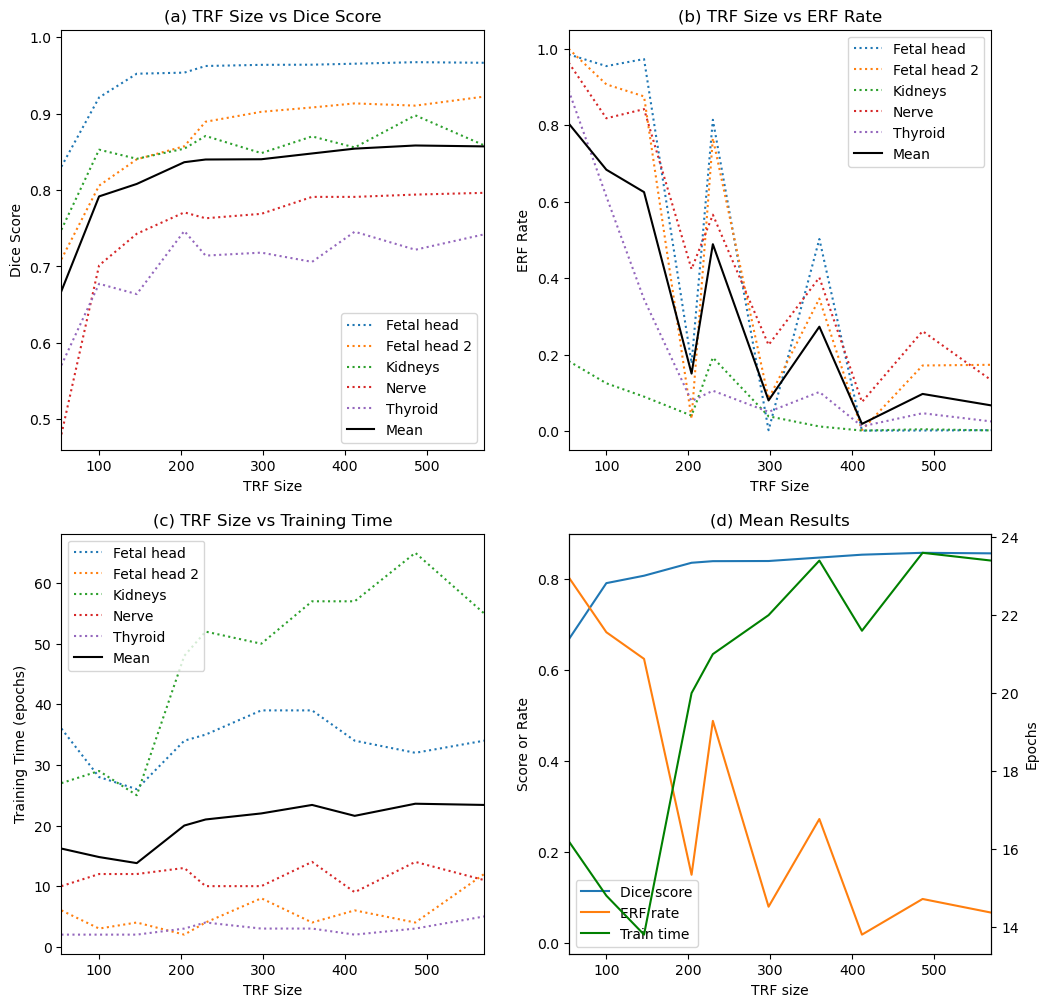

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

plt.subplot(2, 2, 1)

for dataset in repr_datasets.keys():
    name = datasets[dataset]["name"]
    path = datasets[dataset]["path"]
    
    df = pd.read_csv(path, delimiter="\t").T.reset_index()
    df = df.rename(columns=df.iloc[0]).drop(df.index[0])
    df["trf_size"] = df["trf_size"].astype(int)
    plt.plot(df["trf_size"], df["dice_score"], label=name, linestyle="dotted")
    
plt.plot(df_mean["trf_size"], df_mean["dice_score"], label="Mean", color="black", linestyle="solid")
plt.ylim(0.46, 1.01)
plt.xlim(54, 570)
plt.xlabel("TRF Size")
plt.ylabel("Dice Score")
plt.title("(a) TRF Size vs Dice Score")
plt.legend()

plt.subplot(2, 2, 2)

for dataset in repr_datasets.keys():
    name = datasets[dataset]["name"]
    path = datasets[dataset]["path"]
    
    df = pd.read_csv(path, delimiter="\t").T.reset_index()
    df = df.rename(columns=df.iloc[0]).drop(df.index[0])
    df["trf_size"] = df["trf_size"].astype(int)
    # print(min(df["dice_score"]))
    plt.plot(df["trf_size"], df["erf_rate"], label=name, linestyle="dotted")
    
plt.plot(df_mean["trf_size"], df_mean["erf_rate"], label="Mean", color="black", linestyle="solid")
# plt.ylim(0.46, 1.01)
plt.xlim(54, 570)
plt.xlabel("TRF Size")
plt.ylabel("ERF Rate")
plt.title("(b) TRF Size vs ERF Rate")
plt.legend()

plt.subplot(2, 2, 3)

for dataset in repr_datasets.keys():
    name = datasets[dataset]["name"]
    path = datasets[dataset]["path"]
    
    df = pd.read_csv(path, delimiter="\t").T.reset_index()
    df = df.rename(columns=df.iloc[0]).drop(df.index[0])
    df["trf_size"] = df["trf_size"].astype(int)
    print(min(df["training_time"]), max(df["training_time"]))
    plt.plot(df["trf_size"], df["training_time"], label=name, linestyle="dotted")
    
plt.plot(df_mean["trf_size"], df_mean["training_time"], label="Mean", color="black", linestyle="solid")
plt.xlim(54, 570)
plt.xlabel("TRF Size")
plt.ylabel("Training Time (epochs)")
plt.title("(c) TRF Size vs Training Time")
plt.legend()

ax1 = plt.subplot(2, 2, 4)
#  = plt.subplots(figsize=(5, 4))

ax2 = ax1.twinx()

ax1.plot(df_mean["trf_size"], df_mean["dice_score"], label="Dice score")
ax1.plot(df_mean["trf_size"], df_mean["erf_rate"], label="ERF rate")
ax2.plot(df_mean["trf_size"], df_mean["training_time"], label="Train time", color="green")


ax1.set_ylabel("Score or Rate")
ax2.set_ylabel("Epochs")


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="best")

ax1.set_xlabel("TRF size")
plt.title("(d) Mean Results")
ax1.set_xlim(54, 570)

plt.show()
# plt.savefig("analysis.pgf")

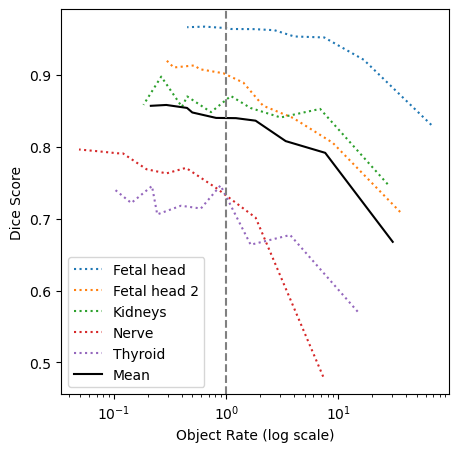

In [6]:
fig, axs = plt.subplots(figsize=(5, 5))


for dataset in repr_datasets.keys():
    name = datasets[dataset]["name"]
    path = datasets[dataset]["path"]
    
    df = pd.read_csv(path, delimiter="\t").T.reset_index()
    df = df.rename(columns=df.iloc[0]).drop(df.index[0])
    # df["trf_size"] = df["trf_size"].astype(int)
    # notmalize object rate
    
    plt.plot(df["object_rate"], df["dice_score"], label=name, linestyle="dotted")
    
plt.plot(df_mean["object_rate"], df_mean["dice_score"], label="Mean", color="black", linestyle="solid")
# plt.ylim(0.46, 1.01)
# plt.xlim(54, 570)
plt.xscale("log")
plt.xlabel("Object Rate (log scale)")
plt.ylabel("Dice Score")
# plt.title("(a) TRF Size vs Dice Score")
# vertical line at 1
plt.axvline(x=1, color="gray", linestyle="dashed")
plt.legend()


plt.show()
# plt.savefig("analysis_OR.pgf")